In [65]:
from astropy.io import fits
import math
import matplotlib.pyplot as plt
import numpy as np

ori_ima = fits.open('/Users/lpr/Data/fits/pridata/goodsn/goodsn_all_wfc3_ir_f160w_060mas_v1.0_drz.fits')[0]
coor_file = open('/Users/lpr/Data/SExtractor/test/160_psf.cat')
coor_line = coor_file.readlines()
del coor_line[:4] # now coor_line store all FWHM, MAG, COORDINATE

coor_x = [] # x coordinate of point source
coor_y = [] # y coordinate of point source
fwhm = []
mag = []
for num in range(0,len(coor_line)):
    x = coor_line[num].split()[2] # store the third line of .cat
    y = coor_line[num].split()[3] # store the forth line of .cat
    fwhm_1 = coor_line[num].split()[0]
    mag_1 = coor_line[num].split()[1]
    if 3.034<float(coor_line[num].split()[0])<3.655 and -10.66<float(coor_line[num].split()[1])<-5 : 
        # image are empty where y<7000,dont know why
            coor_x.append(float(x))
            coor_y.append(float(y))
            fwhm.append(float(fwhm_1))
            mag.append(float(mag_1))

In [5]:
# FWHM = 2*sqrt(2*ln2), cut to 10*sigma
FWHM = 3.655
sigma = FWHM/(2*np.sqrt(2*np.log(2)))
ini_size = 10*int(sigma)*2+1
image = np.zeros([len(coor_x),ini_size,ini_size]) # image date((10*sigma*2+1)x(10*sigma*2+1) pixels) from every point source
#====== get all image data of point source
for num in range(0,len(coor_x)):
    # +1 is because coordinate's index is different with python, begin with 1
    x_range = [int(coor_y[num])-int((ini_size-1)/2),int(coor_y[num])+int((ini_size-1)/2)+1]
    y_range = [int(coor_x[num])-int((ini_size-1)/2),int(coor_x[num])+int((ini_size-1)/2)+1]
    image[num] = ori_ima.data[x_range[0]:x_range[1],y_range[0]:y_range[1]]
    # fits.open.data transform the x and y axis of image
print('image cut is done')

image cut is done


In [112]:
image.shape

(112, 21, 21)

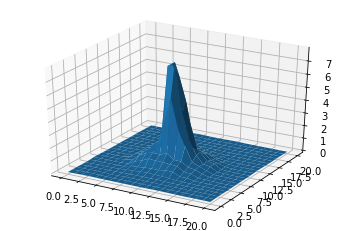

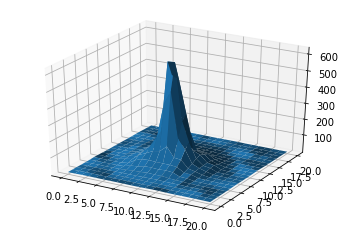

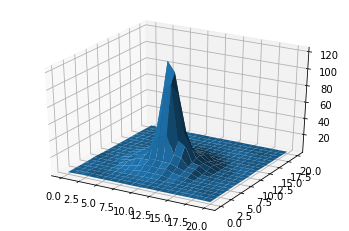

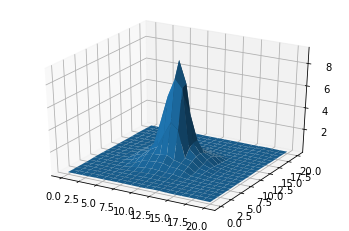

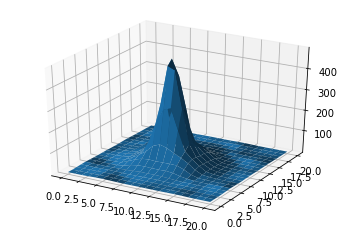

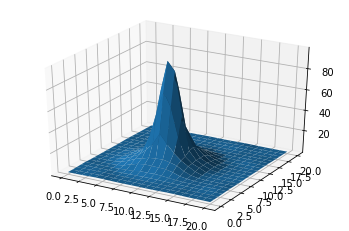

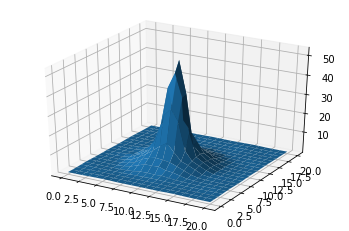

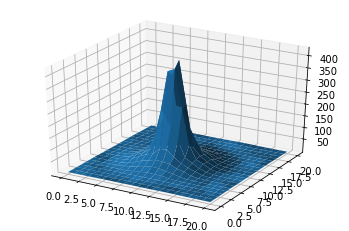

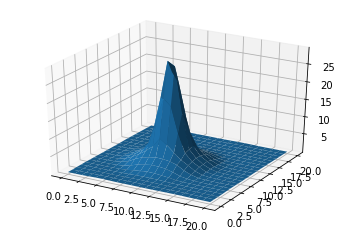

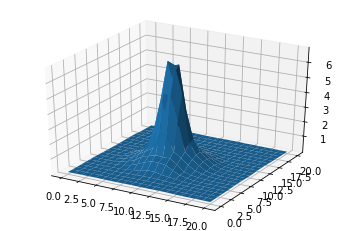

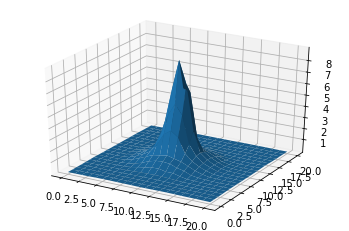

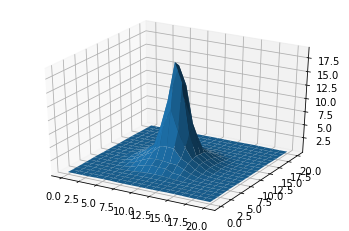

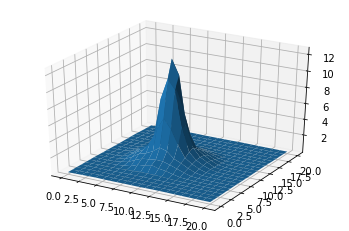

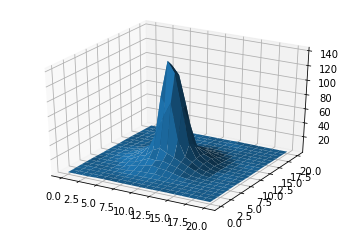

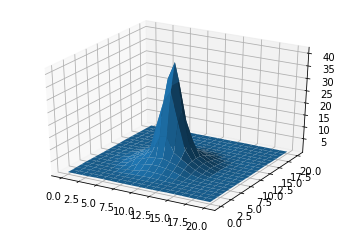

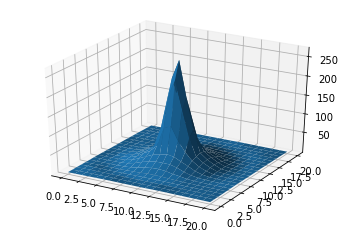

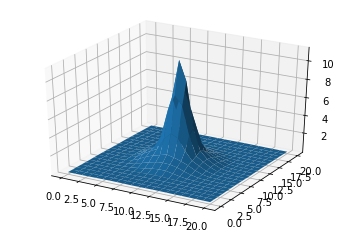

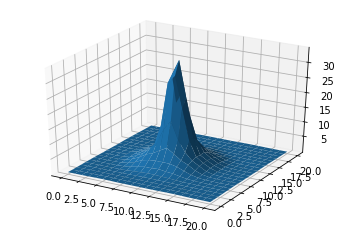

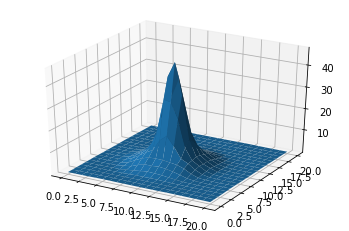

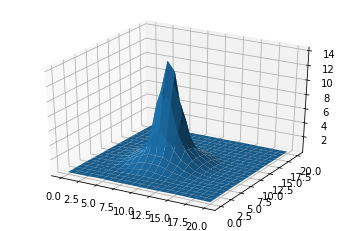

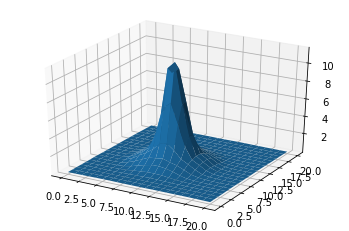

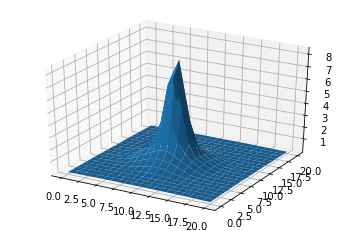

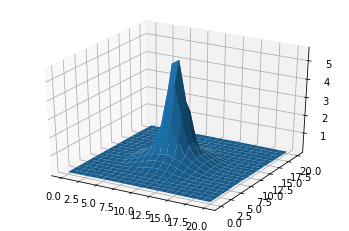

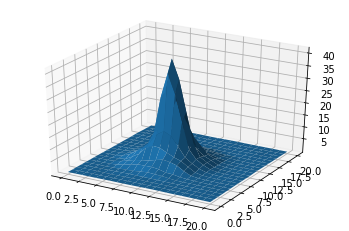

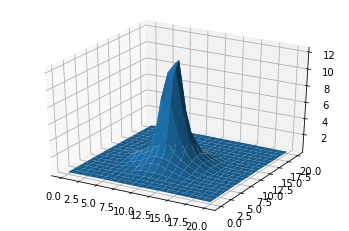

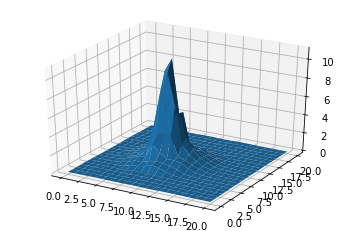

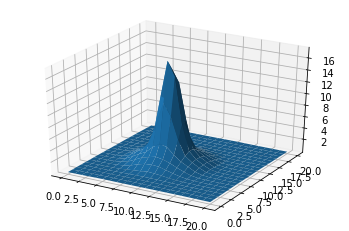

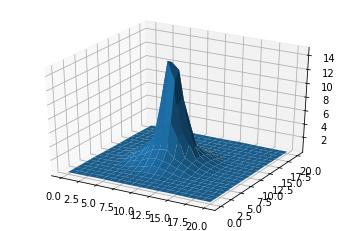

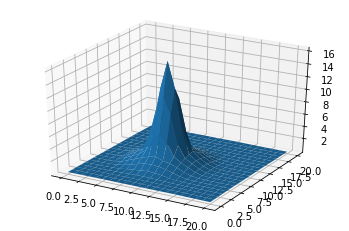

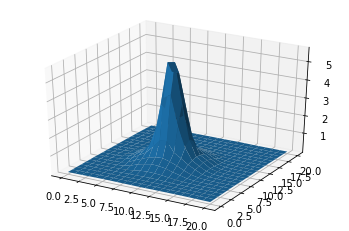

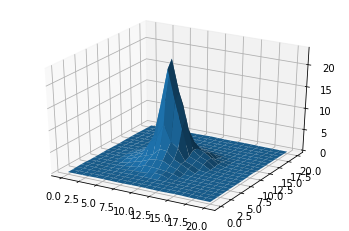

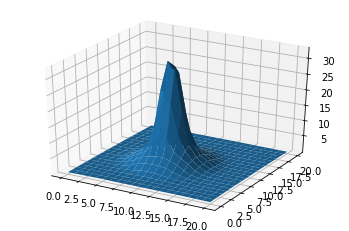

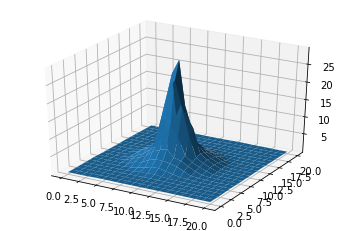

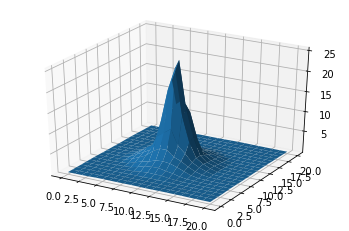

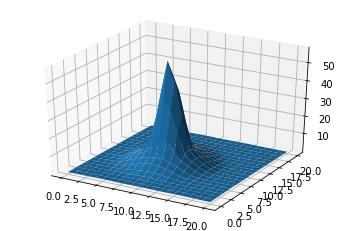

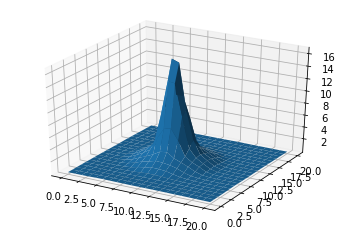

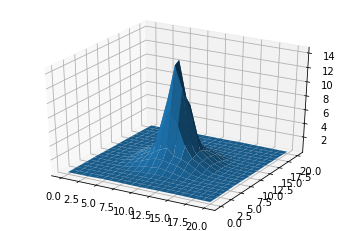

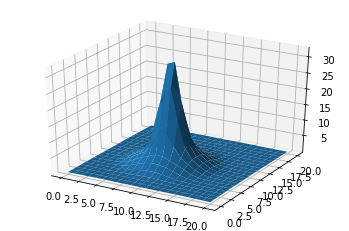

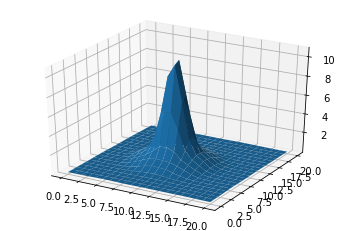

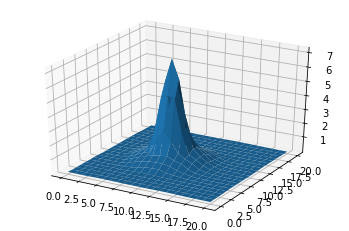

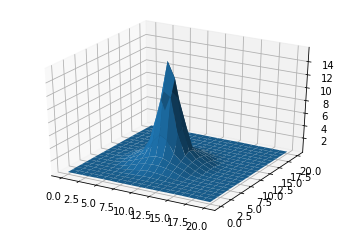

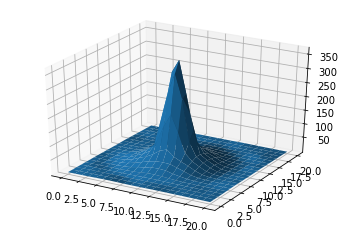

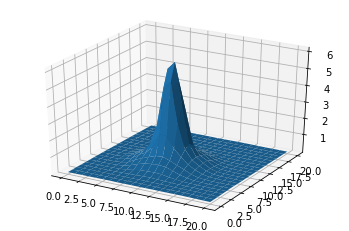

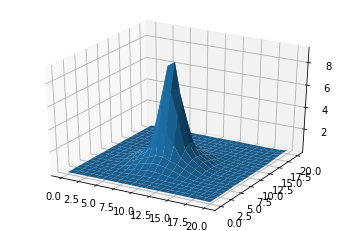

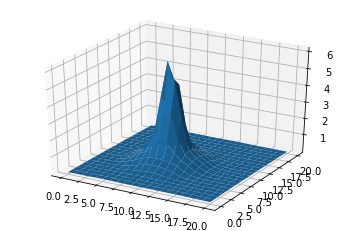

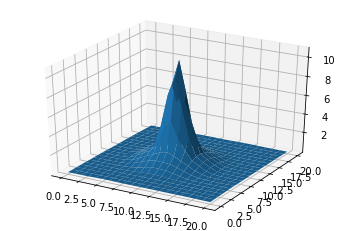

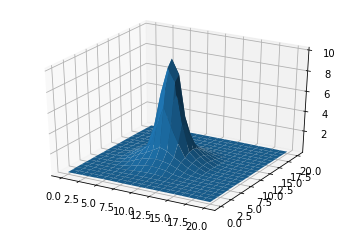

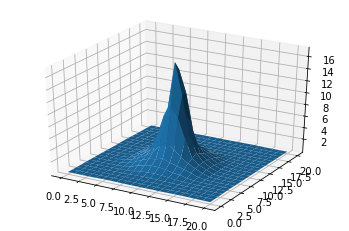

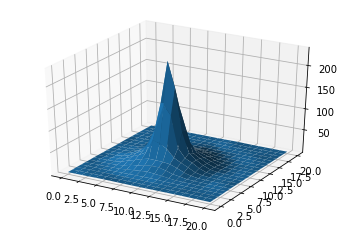

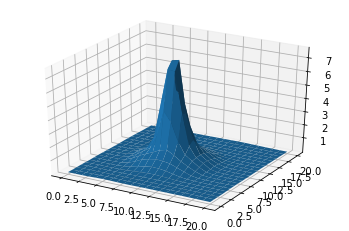

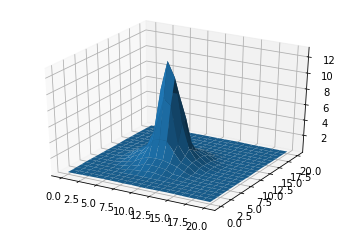

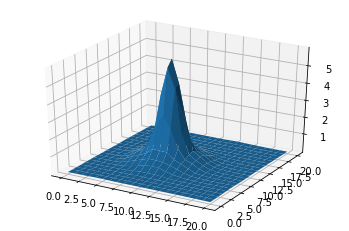

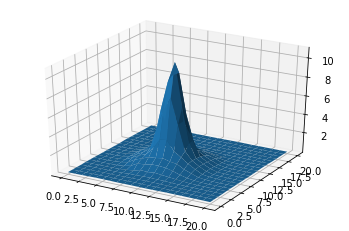

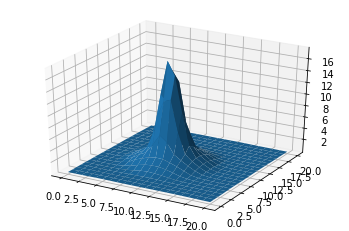

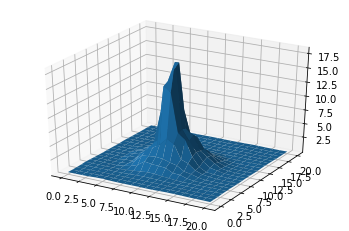

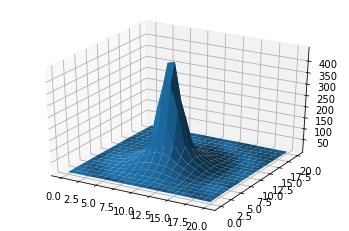

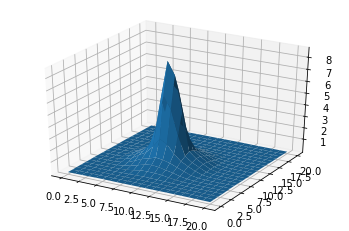

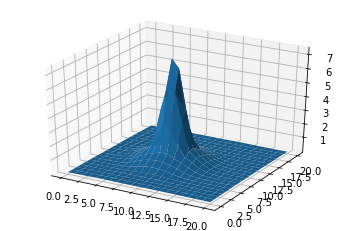

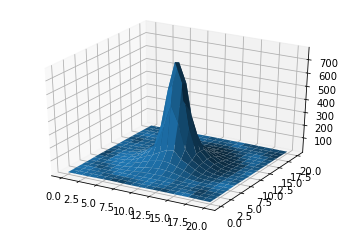

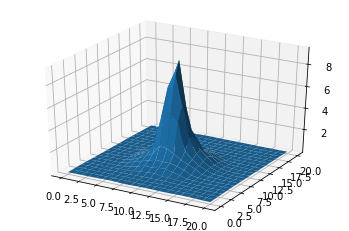

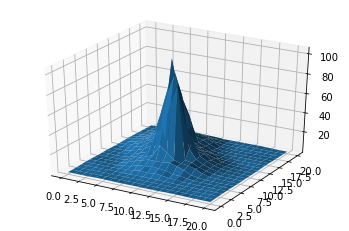

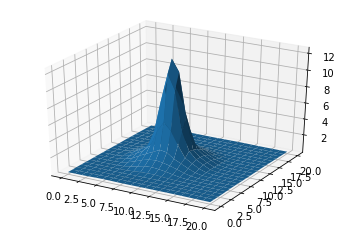

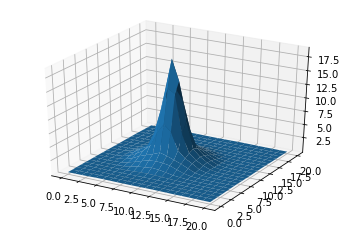

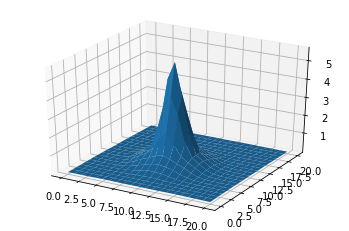

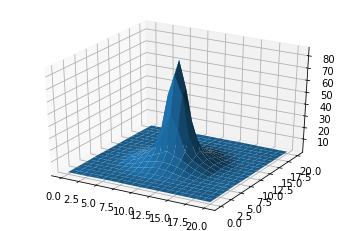

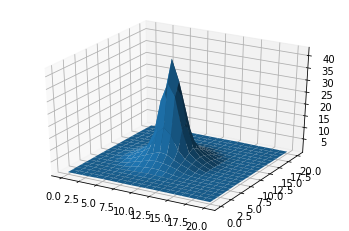

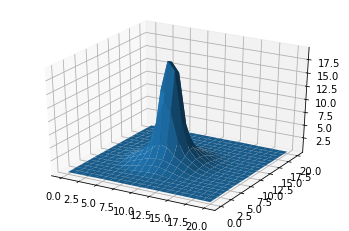

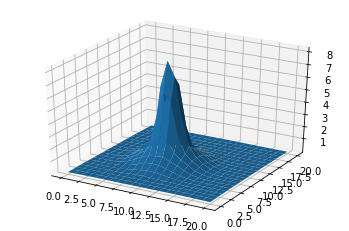

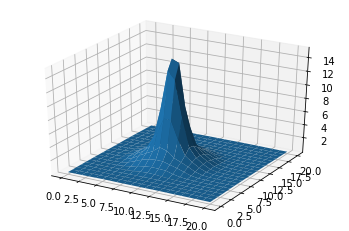

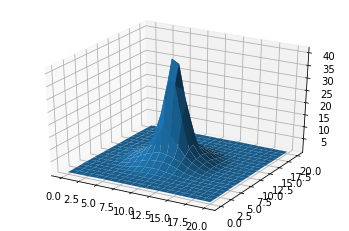

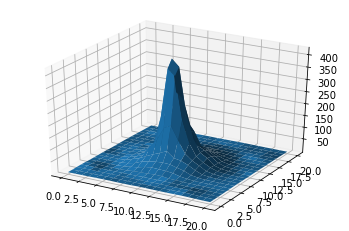

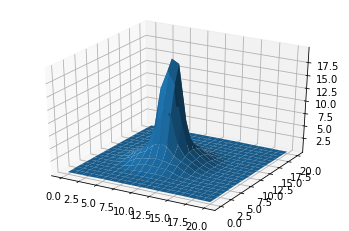

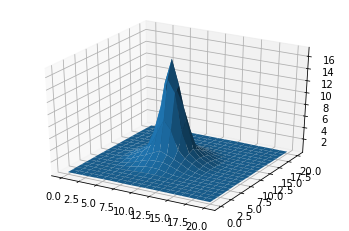

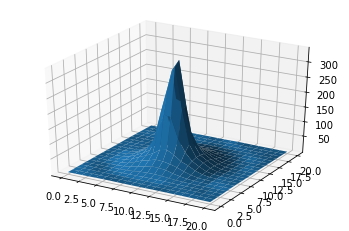

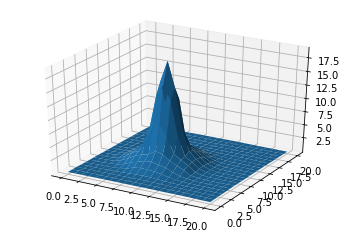

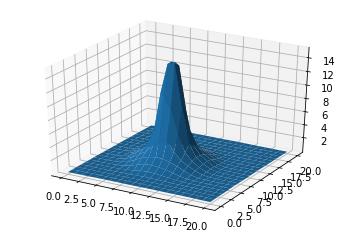

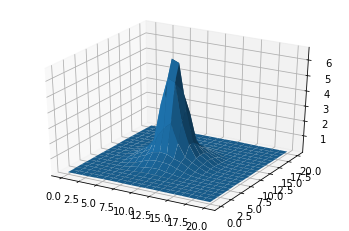

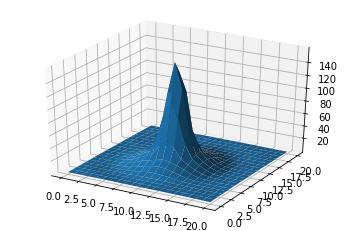

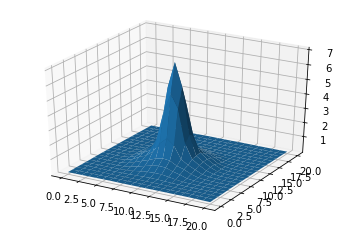

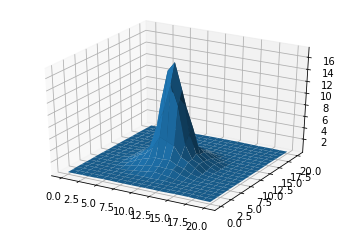

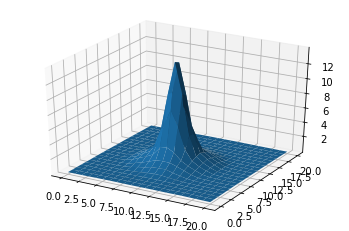

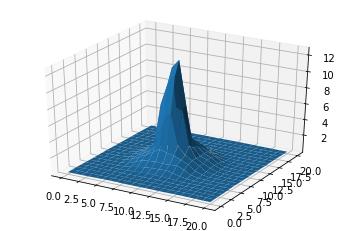

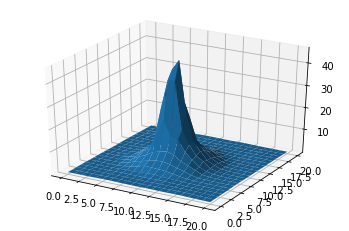

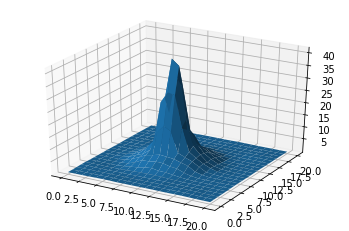

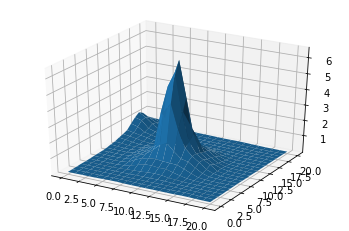

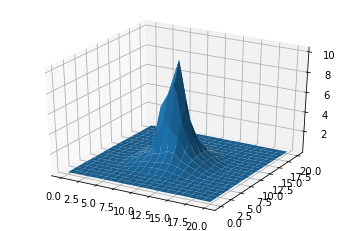

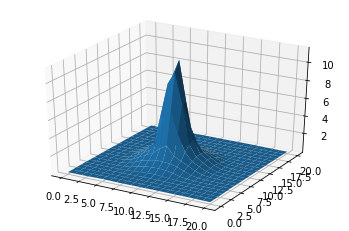

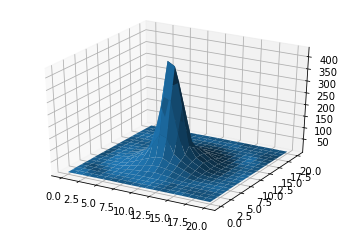

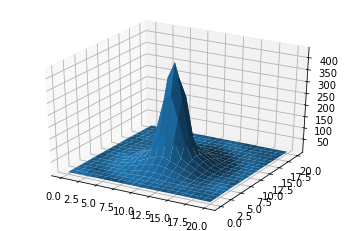

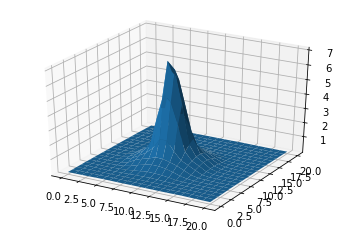

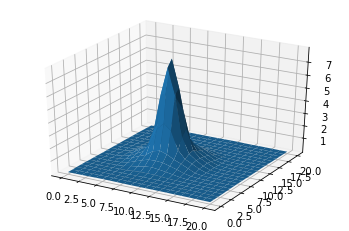

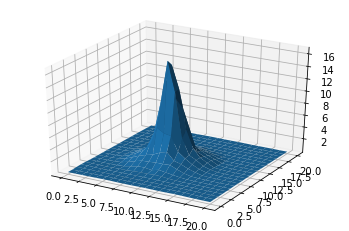

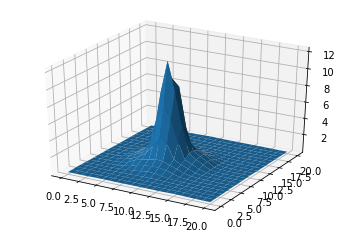

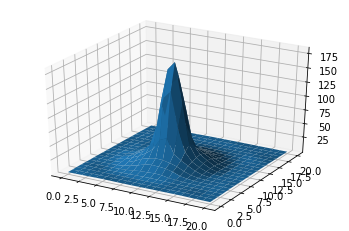

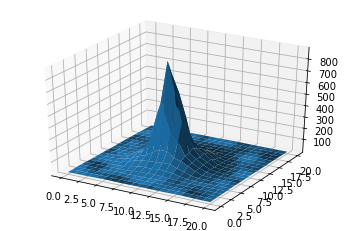

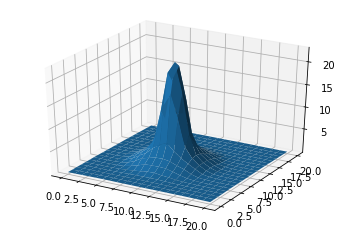

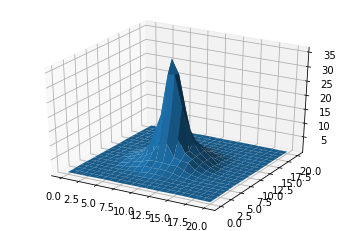

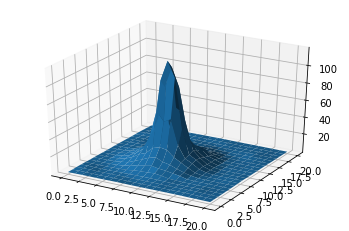

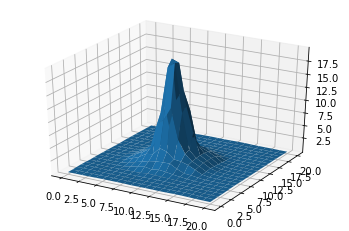

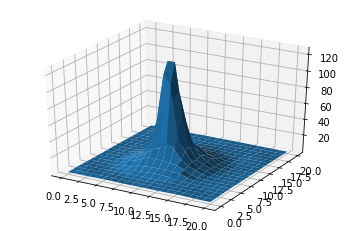

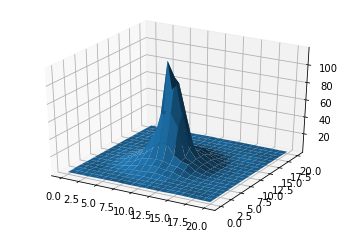

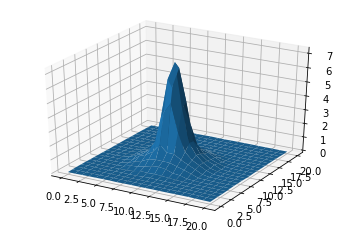

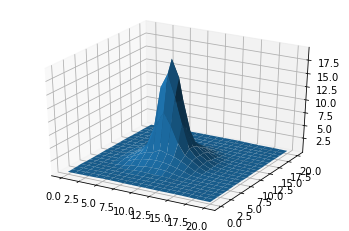

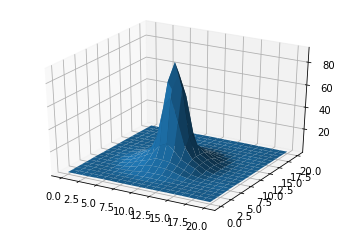

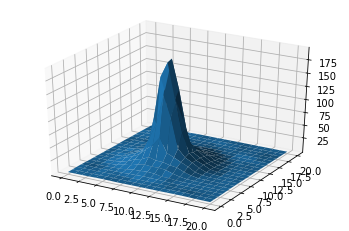

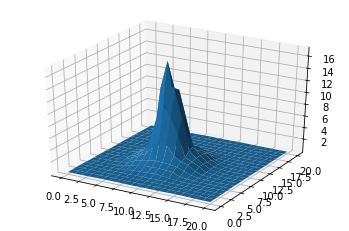

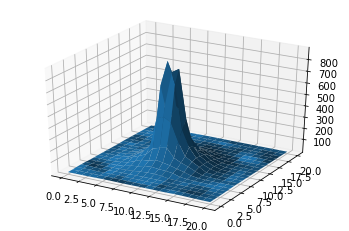

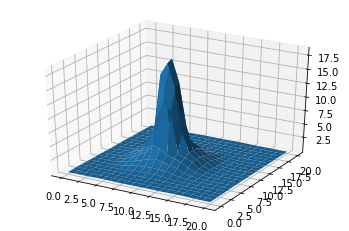

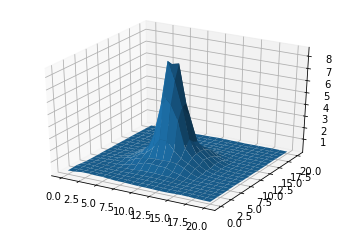

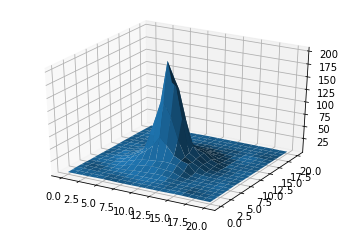

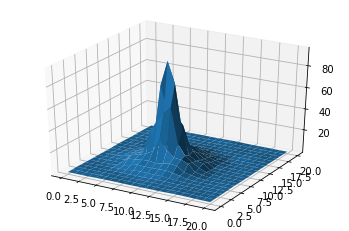

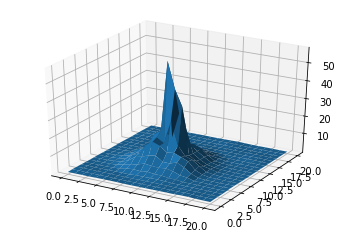

surface export done


In [111]:
#====== export the selected image
for num in range(0,len(image)):
    plt.figure()
    ax = plt.axes(projection ='3d')
    x = np.arange(0,image[num].shape[0])
    y = np.arange(0,image[num].shape[0])
    [x,y] = np.meshgrid(x,y)
    ax.plot_surface(x,y,image[num])
    plt.show()
print('surface export done')


In [19]:
indices = [4,5,8,9,10,11,12,13,14,15]

#====== difine a list of fixed number and size
def gensubpixel(number,size):
 	new_list = np.zeros([size[0],size[1]])
 	for x in range(0,size[0]):
          for y in range(0,size[1]):
              new_list[x][y] = number/(size[0]*size[1])
 	return new_list

#====== get new image data(size is ((10*sigma*2+1)*101)^2) of 
#====== corrected point source center
new_image = np.zeros([len(indices),(ini_size)*101-100,(ini_size)*101-100])
selected_num = 0
for num in indices:
  pixel_sub = np.zeros([(ini_size)*101,(ini_size)*101]) # store every sub pixel data
  for x in range(0,len(image[num])):
          for y in range(0,len(image[num])):
              pixel_sub[x*101:(x+1)*101,y*101:(y+1)*101]= gensubpixel(image[num][x][y],[101,101])
  # math.modf()=[fractional part,integer part]
  center_x = ((ini_size-1)/2)*101+int(math.modf(coor_y[num])[0]*101)
  center_y = ((ini_size-1)/2)*101+int(math.modf(coor_x[num])[0]*101)
  new_image[selected_num] = pixel_sub[int(center_x)-int((ini_size-1)/2)*101:int(center_x)+int((ini_size-1)/2)*101+1,int(center_y)-int((ini_size-1)/2)*101:int(center_y)+int((ini_size-1)/2)*101+1]
  selected_num += 1
print('new image with right center is done')


new image with right center is done


In [78]:
fwhm_final = []
for num in indices:
    fwhm_final.append(fwhm[num])

3.51 -10.0647
3.41 -8.2258
3.36 -6.9034
3.49 -5.3724
3.41 -5.4704
3.39 -6.4101
3.29 -5.9237
3.52 -8.6082
3.16 -7.1726
3.36 -9.2663


Text(0, 0.5, 'number')

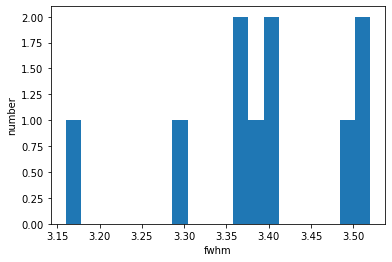

In [81]:
plt.figure()
plt.hist(fwhm_final,20)
plt.xlabel('fwhm')
plt.ylabel('number')

In [77]:
fwhm

[3.16,
 3.07,
 3.11,
 3.4,
 3.51,
 3.41,
 3.57,
 3.3,
 3.36,
 3.49,
 3.41,
 3.39,
 3.29,
 3.52,
 3.16,
 3.36,
 3.34,
 3.25,
 3.28,
 3.43,
 3.38,
 3.55,
 3.36,
 3.5,
 3.45,
 3.48,
 3.23,
 3.46,
 3.31,
 3.3,
 3.33,
 3.48,
 3.34,
 3.45,
 3.42,
 3.25,
 3.44,
 3.4,
 3.39,
 3.19,
 3.31,
 3.29,
 3.42,
 3.35,
 3.33,
 3.31,
 3.33,
 3.39,
 3.16,
 3.29,
 3.37,
 3.17,
 3.27,
 3.45,
 3.55,
 3.46,
 3.17,
 3.29,
 3.47,
 3.45,
 3.65,
 3.3,
 3.37,
 3.34,
 3.22,
 3.35,
 3.22,
 3.34,
 3.31,
 3.35,
 3.33,
 3.39,
 3.3,
 3.24,
 3.55,
 3.37,
 3.44,
 3.3,
 3.27,
 3.5,
 3.19,
 3.44,
 3.47,
 3.32,
 3.43,
 3.57,
 3.23,
 3.23,
 3.38,
 3.49,
 3.17,
 3.2,
 3.23,
 3.3,
 3.64,
 3.36,
 3.53,
 3.42,
 3.4,
 3.14,
 3.41,
 3.26,
 3.52,
 3.3,
 3.32,
 3.42,
 3.21,
 3.27,
 3.56,
 3.51,
 3.1,
 3.29]

In [24]:
for num in range(0,len(new_image)):
    check_image = fits.PrimaryHDU(new_image[num])
    check_hdu = fits.HDUList([check_image])
    check_name = str(indices[num])+'check_image.fits'
    check_hdu.writeto('/Users/lpr/Data/fits/expdata/CONVOLIMAGE/goodsn_all/psf/ini_point_source/'+check_name)

In [37]:
#====== stack image
stack_image = np.zeros([new_image.shape[1],new_image.shape[2]])

In [39]:
new_image[0].shape

(2021, 2021)

In [49]:
for num in range(0,len(new_image)):
    stack_image += new_image[num]/np.sum(new_image[num])
print('image stack is done')

image stack is done


In [46]:
new_image[0]/np.sum(new_image[0])+new_image[1]/np.sum(new_image[1])

array([[1.91894201e-08, 1.91894201e-08, 1.91894201e-08, ...,
        2.50323183e-08, 2.50323183e-08, 2.50323183e-08],
       [1.91894201e-08, 1.91894201e-08, 1.91894201e-08, ...,
        2.50323183e-08, 2.50323183e-08, 2.50323183e-08],
       [1.91894201e-08, 1.91894201e-08, 1.91894201e-08, ...,
        2.50323183e-08, 2.50323183e-08, 2.50323183e-08],
       ...,
       [1.54540232e-08, 1.54540232e-08, 1.54540232e-08, ...,
        2.01234054e-08, 2.01234054e-08, 2.01234054e-08],
       [1.54540232e-08, 1.54540232e-08, 1.54540232e-08, ...,
        2.01234054e-08, 2.01234054e-08, 2.01234054e-08],
       [1.54540232e-08, 1.54540232e-08, 1.54540232e-08, ...,
        2.01234054e-08, 2.01234054e-08, 2.01234054e-08]])

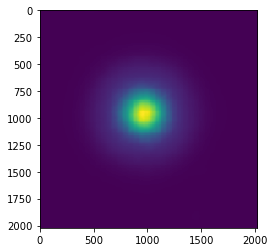

In [51]:
plt.imshow(stack_image)

In [52]:
stack_image.shape

(2021, 2021)

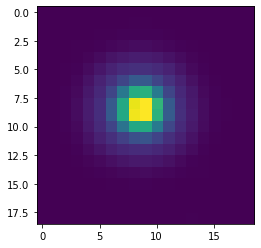

In [61]:
change_orimage = np.zeros([19,19])
ini_index = 1010-50-9*101
for x_pixel in range(0,19):
    for y_pixel in range(0,19):
        change_orimage[x_pixel,y_pixel] = np.sum(stack_image[ini_index+101*x_pixel:ini_index+101*(x_pixel+1),ini_index+101*y_pixel:ini_index+101*(y_pixel+1)])
plt.imshow(change_orimage)

In [63]:
#====== save psf image as fits
data = fits.PrimaryHDU(change_orimage)
hdu = fits.HDUList([data])
hdu.writeto('/Users/lpr/Data/fits/expdata/CONVOLIMAGE/goodsn_all/psf/psf_160_stackimage.fits')
print('psf with .fits is done')

psf with .fits is done


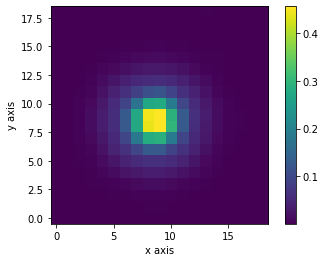

psf stack image is shown


In [64]:
#======= show psf image
plt.figure()
plt.imshow(change_orimage,interpolation=None,origin='lower')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.colorbar()
plt.savefig('/Users/lpr/Data/fits/expdata/CONVOLIMAGE/goodsn_all/psf/psf_160_stackimage.eps')
plt.show()
print('psf stack image is shown')